# Allowing all features regardless of correlation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [ ]:
df = pd.read_csv('census.txt', header=None)

# Data exploration and cleansing

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'incomegt50k']
df.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,incomegt50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
incomegt50k       0
dtype: int64

In [ ]:
df.isin([0]).sum()

age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital               0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain      44807
capital_loss      46560
hours_per_week        0
native_country        0
incomegt50k           0
dtype: int64

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
incomegt50k       object
dtype: object

In [ ]:
print("age:\n", df.age.unique(), "\nworkclass:\n", df.workclass.unique(), "\nfnlwgt:\n", df.fnlwgt.unique(), "\neducation:\n", df.education.unique(), "\neducation_num:\n", df.education_num.unique(), "\nmarital:\n", df.marital.unique(), "\noccupation:\n", df.occupation.unique(), "\nrelationship:\n", df.relationship.unique(), "\nrace:\n", df.race.unique(), "\nsex:\n", df.sex.unique(), "\nhours_per_week:\n", df.hours_per_week.unique(), "\nnative_country:\n", df.native_country.unique(), "\nincome>50k:\n", df.incomegt50k.unique())

age:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 
workclass:
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 
fnlwgt:
 [ 77516  83311 215646 ... 173449  89686 350977] 
education:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 
education_num:
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 
marital:
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 
occupation:
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fish

In [ ]:
#df['education_num']=df['education_num'].astype(str)
df=df.drop(columns=['capital_gain', 'capital_loss','education_num'])
# too much missing data for Capital Gain and Loss and further exploration revealed that education_num is 
# too highly correlated with education level
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital           object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
incomegt50k       object
dtype: object

In [ ]:
print("age:\n", df.age.unique(), "\nworkclass:\n", df.workclass.unique(), "\nfnlwgt:\n", df.fnlwgt.unique(), "\neducation:\n", df.education.unique(), "\nmarital:\n", df.marital.unique(), "\noccupation:\n", df.occupation.unique(), "\nrelationship:\n", df.relationship.unique(), "\nrace:\n", df.race.unique(), "\nsex:\n", df.sex.unique(), "\nhours_per_week:\n", df.hours_per_week.unique(), "\nnative_country:\n", df.native_country.unique(), "\nincome>50k:\n", df.incomegt50k.unique())

age:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 
workclass:
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 
fnlwgt:
 [ 77516  83311 215646 ... 173449  89686 350977] 
education:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 
marital:
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 
occupation:
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' 

In [ ]:
df['fnlwgt']=df['fnlwgt'].astype('int64')
df['fnlwgt'].head()

0     77516
1     83311
2    215646
3    234721
4    338409
Name: fnlwgt, dtype: int64

In [ ]:
def remove(x):
    if isinstance(x, str):
        return x.strip()
    else:
        return x

df = df.applymap(remove)

In [ ]:
print("age:\n", df.age.unique(), "\nworkclass:\n", df.workclass.unique(), "\nfnlwgt:\n", df.fnlwgt.unique(), "\neducation:\n", df.education.unique(), "\nmarital:\n", df.marital.unique(), "\noccupation:\n", df.occupation.unique(), "\nrelationship:\n", df.relationship.unique(), "\nrace:\n", df.race.unique(), "\nsex:\n", df.sex.unique(), "\nhours_per_week:\n", df.hours_per_week.unique(), "\nnative_country:\n", df.native_country.unique(), "\nincome>50k:\n", df.incomegt50k.unique())

age:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 
workclass:
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
fnlwgt:
 [ 77516  83311 215646 ... 173449  89686 350977] 
education:
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
marital:
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
occupation:
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 
relationsh

In [ ]:
df.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital              0
occupation        2809
relationship         0
race                 0
sex                  0
hours_per_week       0
native_country     857
incomegt50k          0
dtype: int64

In [ ]:
def change(x):
    if x=='?':
        x='Unknown'
    else:
        return x

df['native_country'] = df.native_country.apply(change)
df.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital              0
occupation        2809
relationship         0
race                 0
sex                  0
hours_per_week       0
native_country       0
incomegt50k          0
dtype: int64

In [ ]:
isblank = ['?']
nwork = ['Never-worked']
df2 = df[df.workclass.isin(nwork) & df.occupation.isin(isblank)]
df2

,age,workclass,fnlwgt,education,marital,occupation,relationship,race,sex,hours_per_week,native_country,incomegt50k
5361,18,Never-worked,206359,10th,Never-married,?,Own-child,White,Male,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,Divorced,?,Not-in-family,White,Male,35,United-States,<=50K
14772,17,Never-worked,237272,10th,Never-married,?,Own-child,White,Male,30,United-States,<=50K
20337,18,Never-worked,157131,11th,Never-married,?,Own-child,White,Female,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,Never-married,?,Own-child,Black,Male,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,Married-civ-spouse,?,Wife,Black,Female,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,Never-married,?,Own-child,White,Male,4,United-States,<=50K
41346,17,Never-worked,131593,11th,Never-married,?,Own-child,Black,Female,20,United-States,<=50K
44168,20,Never-worked,273905,HS-grad,Married-spouse-absent,?,Other-relative,White,Male,35,United-States,<=50K
46459,18,Never-worked,162908,11th,Never-married,?,Own-child,White,Male,35,United-States,<=50K


In [ ]:
mask = (df['workclass'] == "Never-worked") & (df['occupation'] == '?')
df['occupation'][mask] = 'None'

C:\Users\rebec\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital              0
occupation        2799
relationship         0
race                 0
sex                  0
hours_per_week       0
native_country       0
incomegt50k          0
dtype: int64

In [ ]:
isblank = ['?']
df1 = df[df.workclass.isin(isblank) & df.occupation.isin(isblank)]
df1

,age,workclass,fnlwgt,education,marital,occupation,relationship,race,sex,hours_per_week,native_country,incomegt50k
27,54,?,180211,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
61,32,?,293936,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,None,<=50K
69,25,?,200681,Some-college,Never-married,?,Own-child,White,Male,40,United-States,<=50K
77,67,?,212759,10th,Married-civ-spouse,?,Husband,White,Male,2,United-States,<=50K
106,17,?,304873,10th,Never-married,?,Own-child,White,Female,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,?,265201,Some-college,Married-civ-spouse,?,Husband,White,Male,14,United-States,<=50K
48769,21,?,212661,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K
48800,73,?,144872,HS-grad,Married-civ-spouse,?,Husband,White,Male,25,Canada,<=50K
48812,81,?,26711,Assoc-voc,Married-civ-spouse,?,Husband,White,Male,20,United-States,<=50K


In [ ]:
df1.fnlwgt.sum()

524126111

In [ ]:
df = df.replace(to_replace = '?',value = 'Unknown')

In [ ]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
marital           0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
incomegt50k       0
dtype: int64

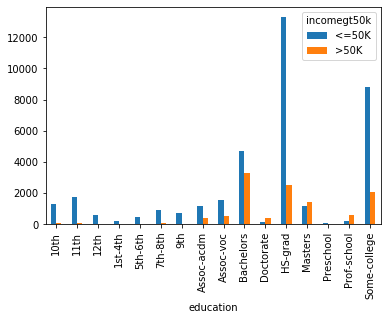

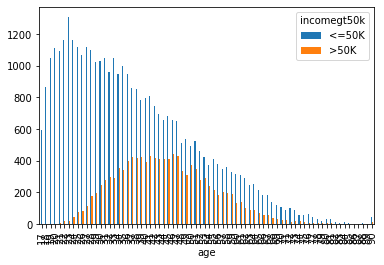

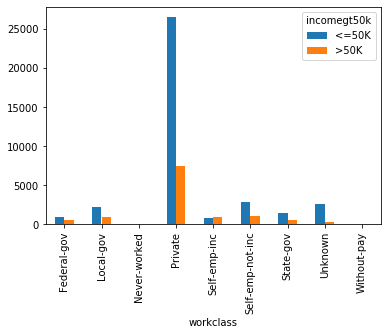

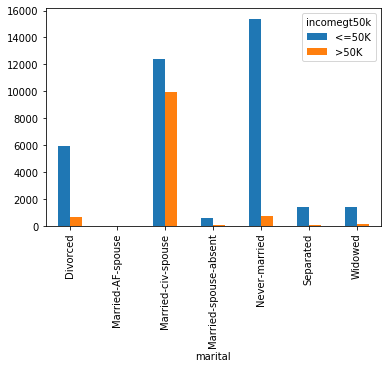

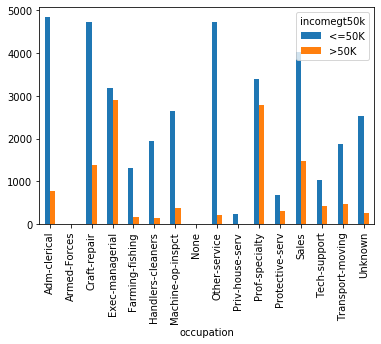

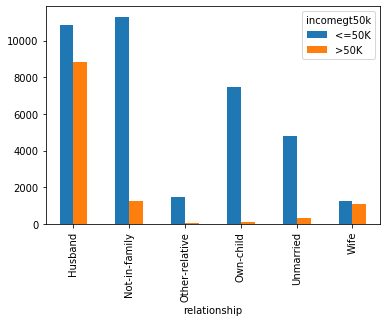

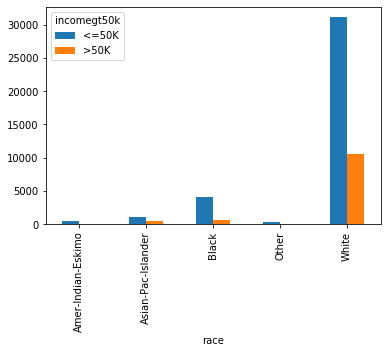

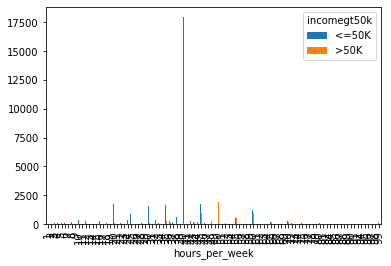

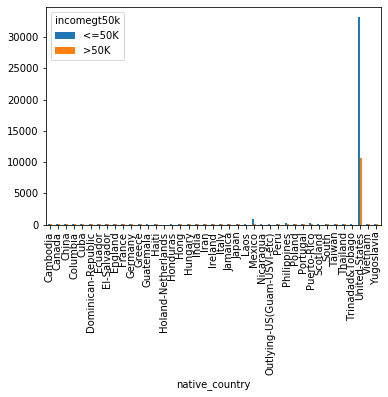

In [ ]:
%matplotlib inline
pd.crosstab(df['education'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['age'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['workclass'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['marital'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['occupation'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['relationship'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['race'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['hours_per_week'], df['incomegt50k']).plot(kind='bar')
pd.crosstab(df['native_country'], df['incomegt50k']).plot(kind='bar')

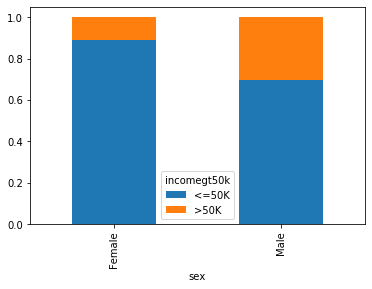

In [ ]:
table=pd.crosstab(df['sex'], df['incomegt50k'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

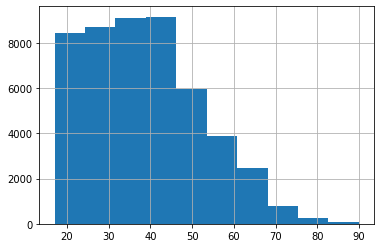

In [ ]:
df.age.hist()

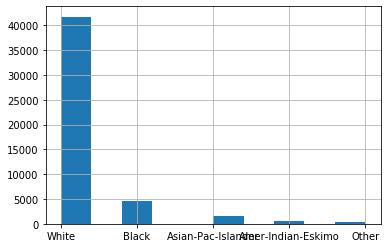

In [ ]:
df.race.hist()

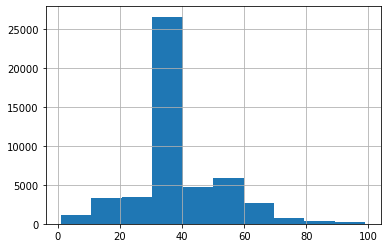

In [ ]:
df.hours_per_week.hist()

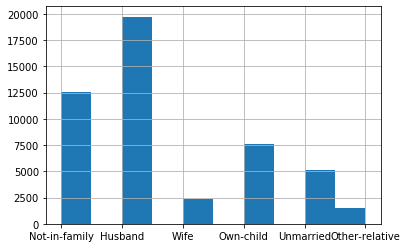

In [ ]:
df.relationship.hist()

# Double check clean

In [ ]:
df.describe()

,age,fnlwgt,hours_per_week
count,48842.000000,4.884200e+04,48842.000000
mean,38.643585,1.896641e+05,40.422382
std,13.710510,1.056040e+05,12.391444
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.175505e+05,40.000000
50%,37.000000,1.781445e+05,40.000000
75%,48.000000,2.376420e+05,45.000000
max,90.000000,1.490400e+06,99.000000


In [ ]:
print("age:\n", df.age.unique(), "\nworkclass:\n", df.workclass.unique(), "\nfnlwgt:\n", df.fnlwgt.unique(), "\neducation:\n", df.education.unique(), "\nmarital:\n", df.marital.unique(), "\noccupation:\n", df.occupation.unique(), "\nrelationship:\n", df.relationship.unique(), "\nrace:\n", df.race.unique(), "\nsex:\n", df.sex.unique(), "\nhours_per_week:\n", df.hours_per_week.unique(), "\nnative_country:\n", df.native_country.unique(), "\nincome>50k:\n", df.incomegt50k.unique())

age:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 
workclass:
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
fnlwgt:
 [ 77516  83311 215646 ... 173449  89686 350977] 
education:
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
marital:
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
occupation:
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' 

In [ ]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
marital               7
occupation           16
relationship          6
race                  5
sex                   2
hours_per_week       96
native_country       41
incomegt50k           2
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(48782, 12)

# Check frequency of education, gender to income

In [ ]:
df.groupby('education')['incomegt50k'].value_counts(normalize = True).sort_values(ascending = True)

education     incomegt50k
Preschool     >50K           0.012346
1st-4th       >50K           0.032653
11th          >50K           0.050801
5th-6th       >50K           0.053254
9th           >50K           0.054233
10th          >50K           0.062635
7th-8th       >50K           0.064990
12th          >50K           0.073282
HS-grad       >50K           0.158612
Some-college  >50K           0.189744
Assoc-voc     >50K           0.253521
Assoc-acdm    >50K           0.257964
Prof-school   <=50K          0.260192
Doctorate     <=50K          0.274411
Bachelors     >50K           0.413182
Masters       <=50K          0.450847
              >50K           0.549153
Bachelors     <=50K          0.586818
Doctorate     >50K           0.725589
Prof-school   >50K           0.739808
Assoc-acdm    <=50K          0.742036
Assoc-voc     <=50K          0.746479
Some-college  <=50K          0.810256
HS-grad       <=50K          0.841388
12th          <=50K          0.926718
7th-8th       <=50K     

In [ ]:
df.groupby('occupation')['incomegt50k'].value_counts(normalize = True).sort_values(ascending = True)

occupation         incomegt50k
Priv-house-serv    >50K           0.012500
Other-service      >50K           0.041480
Handlers-cleaners  >50K           0.066634
Unknown            >50K           0.094812
Farming-fishing    >50K           0.116577
Machine-op-inspct  >50K           0.123011
Adm-clerical       >50K           0.136996
Transport-moving   >50K           0.204333
Craft-repair       >50K           0.226520
Sales              >50K           0.268182
Tech-support       >50K           0.290657
Protective-serv    >50K           0.313646
Armed-Forces       >50K           0.333333
Prof-specialty     >50K           0.451168
Exec-managerial    >50K           0.477717
                   <=50K          0.522283
Prof-specialty     <=50K          0.548832
Armed-Forces       <=50K          0.666667
Protective-serv    <=50K          0.686354
Tech-support       <=50K          0.709343
Sales              <=50K          0.731818
Craft-repair       <=50K          0.773480
Transport-moving   <=50

In [ ]:
df.groupby('sex')['incomegt50k'].value_counts(normalize = True).sort_values(ascending = True)

sex     incomegt50k
Female  >50K           0.109366
Male    >50K           0.303922
        <=50K          0.696078
Female  <=50K          0.890634
Name: incomegt50k, dtype: float64

## correlation to income using broad categories 

In [ ]:
over50k = df['incomegt50k'] == '>50K'
df_over50k = df[over50k]
df_over50k

,age,workclass,fnlwgt,education,marital,occupation,relationship,race,sex,hours_per_week,native_country,incomegt50k
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48815,38,Private,149347,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,>50K
48816,43,Local-gov,23157,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
48822,40,Private,202168,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,55,United-States,>50K
48826,50,Local-gov,139347,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,40,None,>50K


In [ ]:
df_num = df.copy()
df_num.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
       'incomegt50k'],
      dtype='object')

In [ ]:
df_num['workclass']=df_num['workclass'].astype('category').cat.codes
df_num['education']=df_num['education'].astype('category').cat.codes
#df_num['education_num']=df_num['education_num'].astype('category').cat.codes
df_num['marital']=df_num['marital'].astype('category').cat.codes
df_num['occupation']=df_num['occupation'].astype('category').cat.codes
df_num['relationship']=df_num['relationship'].astype('category').cat.codes
df_num['race']=df_num['race'].astype('category').cat.codes
df_num['sex']=df_num['sex'].astype('category').cat.codes
df_num['native_country']=df_num['native_country'].astype('category').cat.codes
df_num['incomegt50k']=df_num['incomegt50k'].astype('category').cat.codes

In [ ]:
df_num.corrwith(over50k)

age               0.230179
workclass        -0.054623
fnlwgt           -0.006255
education         0.080107
marital          -0.198827
occupation        0.007754
relationship     -0.253158
race              0.070951
sex               0.214642
hours_per_week    0.227638
native_country    0.011969
incomegt50k       1.000000
dtype: float64

In [ ]:
corr_matrix = df_num.corr()
print(corr_matrix['incomegt50k'].sort_values(ascending = False))

incomegt50k       1.000000
age               0.230179
hours_per_week    0.227638
sex               0.214642
education         0.080107
race              0.070951
native_country    0.011969
occupation        0.007754
fnlwgt           -0.006255
workclass        -0.054623
marital          -0.198827
relationship     -0.253158
Name: incomegt50k, dtype: float64


## using get dummies, then running correlation on binary values and removing variables with low correlation to income

In [ ]:
df_dum = df.copy()
df_dum= pd.get_dummies(df_dum, columns=['age','hours_per_week','sex','education','incomegt50k','race','native_country','occupation','fnlwgt','workclass','marital','relationship'])

In [ ]:
print("age:\n", df.age.unique(), "\nworkclass:\n", df.workclass.unique(), "\nfnlwgt:\n", df.fnlwgt.unique(), "\neducation:\n", df.education.unique(), "\nmarital:\n", df.marital.unique(), "\noccupation:\n", df.occupation.unique(), "\nrelationship:\n", df.relationship.unique(), "\nrace:\n", df.race.unique(), "\nsex:\n", df.sex.unique(), "\nhours_per_week:\n", df.hours_per_week.unique(), "\nnative_country:\n", df.native_country.unique(), "\nincome>50k:\n", df.incomegt50k.unique())

age:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 
workclass:
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
fnlwgt:
 [ 77516  83311 215646 ... 173449  89686 350977] 
education:
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
marital:
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
occupation:
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' 

In [ ]:
df_dum.head()

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
#corr_values = df_dum.corrwith(over50k).sort_values(ascending = True)
#print(corr_values)

In [ ]:
#df_dum.corrwith(over50k).sort_values(ascending = True).nlargest(30)

In [ ]:
#df_dum.corrwith(over50k).sort_values(ascending = True).nsmallest(30)

In [ ]:
#corr_bool = df_dum.corrwith(over50k).sort_values(ascending = True).between(-.06,.06)
#print(corr_bool)

In [ ]:
#type(corr_bool)

In [ ]:
#df_corr = pd.concat([corr_values, corr_bool], axis=1)
#print(df_corr)

In [ ]:
#df_corr.columns = ['Value','Boolean']
#print(df_corr)

In [ ]:
#df_corr_true = df_corr[df_corr.Boolean == True]
#print(df_corr_true)

In [ ]:
#df_corr_false = df_corr[df_corr.Boolean == False]
#print(df_corr_false)

In [ ]:
#names_list =df_corr_false.index.tolist()
#print(names_list)

# creating final df for analysis

In [1]:
df_final = df_dum
df_final=df_final.drop(columns=['incomegt50k_<=50K'])


NameError: ignored

In [ ]:
df_final['incomegt50k_>50K'].value_counts()

In [ ]:
sns.countplot(x='incomegt50k_>50K', data=df_final, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_less50k = len(df_final[df_final['incomegt50k_>50K']==0])
count_over50k = len(df_final[df_final['incomegt50k_>50K']==1])
pct_of_less50k = count_less50k/(count_less50k+count_over50k)
print("percentage of incomes less than 50k is ", pct_of_less50k*100)
pct_of_over50k = count_over50k/(count_less50k+count_over50k)
print("percentage of incomes over 50k is ", pct_of_over50k*100)

In [ ]:
%matplotlib inline
table1=pd.crosstab(df_final['sex_Female'], df_final['incomegt50k_>50K'])
table1.div(table1.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
table2=pd.crosstab(df_final['sex_Male'], df_final['incomegt50k_>50K'])
table2.div(table2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
table2=pd.crosstab(df_final['marital_Married-civ-spouse'], df_final['incomegt50k_>50K'])
table2.div(table2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
table2=pd.crosstab(df_final['marital_Never-married'], df_final['incomegt50k_>50K'])
table2.div(table2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [ ]:
X = df_final.loc[:,df_final.columns != 'incomegt50k_>50K']
X.head()

In [ ]:
y = df_final.loc[:,'incomegt50k_>50K']
y.head(20)

# Check colinearity

In [ ]:
"""corm = df_final.iloc[:,:-1].corr()
masko = np.zeros_like(corm, dtype = np.bool)
masko[np.triu_indices_from(masko)] = True
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=False)
plt.show()"""

"corm = df_final.iloc[:,:-1].corr()\nmasko = np.zeros_like(corm, dtype = np.bool)\nmasko[np.triu_indices_from(masko)] = True\nfig, ax = plt.subplots(figsize = (20,10))\nsns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=False)\nplt.show()"

In [ ]:
"""c = df_final.corr().abs()
s = c.unstack()
so = s.sort_values(kind='quicksort')
print(so.nlargest(40))"""

"c = df_final.corr().abs()\ns = c.unstack()\nso = s.sort_values(kind='quicksort')\nprint(so.nlargest(40))"

In [ ]:
"""corr_matrix = df_final.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
print(sol)"""

'corr_matrix = df_final.corr().abs()\nsol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))\nprint(sol)'

# dummy classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)



In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(36586, 28795)
(12196, 28795)
(36586,)
(12196,)


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score

dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy.fit(X_train, y_train)

ydummy_train = dummy.predict(X_train)
ydummy_train[0:9] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
ydummy_test = dummy.predict(X_test)
print ('Confusion matrix for DummyClassifier is : \n \n', confusion_matrix(y_test,ydummy_test))

Confusion matrix for DummyClassifier is : 
 
 [[9271    0]
 [2925    0]]


In [ ]:
print ('Accuracy score for DummyClassifier is : \n \n', accuracy_score(y_test, ydummy_test))

Accuracy score for DummyClassifier is : 
 
 0.7601672679567071


# result: baseline accuracy is 76% 

# SMOTE on training data to balance outcomes

In [ ]:
"""from imblearn.over_sampling import SMOTE
over_S = SMOTE(random_state=0)
columns = X_train.columns

over_SX, over_Sy = over_S.fit_sample(X_train, y_train)
over_SX = pd.DataFrame(data=over_SX, columns=columns)
over_Sy = pd.DataFrame(data=over_Sy, columns = ['incomegt50k_>50K'])
print("length of oversampled data is ", len(over_SX))
print("number of less than 50k in oversampled data is ", len(over_Sy[over_Sy['incomegt50k_>50K']==0]))
print("number of more than 50k in oversampled data is ", len(over_Sy[over_Sy['incomegt50k_>50K']==1]))"""

'from imblearn.over_sampling import SMOTE\nover_S = SMOTE(random_state=0)\ncolumns = X_train.columns\n\nover_SX, over_Sy = over_S.fit_sample(X_train, y_train)\nover_SX = pd.DataFrame(data=over_SX, columns=columns)\nover_Sy = pd.DataFrame(data=over_Sy, columns = [\'incomegt50k_>50K\'])\nprint("length of oversampled data is ", len(over_SX))\nprint("number of less than 50k in oversampled data is ", len(over_Sy[over_Sy[\'incomegt50k_>50K\']==0]))\nprint("number of more than 50k in oversampled data is ", len(over_Sy[over_Sy[\'incomegt50k_>50K\']==1]))'

# logistic regression, confusion matrix, and predict proba using all variables 

Prediction and Probability

In [ ]:
from sklearn.linear_model import LogisticRegression
#X = over_SX[columns]
#y = over_Sy['incomegt50k_>50K']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
logr = LogisticRegression(random_state=10)
logr.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

ypred_train_logr = logr.predict(X_train)
ypred_test_logr = logr.predict(X_test)

print ('First 8 Predictions for training data are: ', ypred_train_logr[:8])
print ('First 8 Predictions for test data are: ', ypred_test_logr[:8], '\n')
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr), '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr), '\n')
print('__________________________________')
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train_logr), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train_logr), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train_logr), '\n')
print ('f1-score for train data is : \n', f1_score(y_train,ypred_train_logr), '\n')
print('_______________________________-')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1-score for test data is : \n', f1_score(y_test,ypred_test_logr), '\n')

C:\Users\rebec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


First 8 Predictions for training data are:  [0 0 0 0 0 0 0 0]
First 8 Predictions for test data are:  [0 0 0 0 0 1 0 0] 

confusion matrix for training data is : 
 [[26547  1285]
 [ 2684  6070]] 

confusion_matrix for test data is : 
 [[8525  746]
 [1227 1698]] 

__________________________________
Accuracy for train data is : 
 0.8915158803914065 

Recall for train data is : 
 0.693397304089559 

Precision for train data is : 
 0.8252889191026512 

f1-score for train data is : 
 0.7536159910608976 

_______________________________-
Accuracy for test data is : 
 0.8382256477533617 

Recall for test data is : 
 0.5805128205128205 

Precision for test data is : 
 0.6947626841243862 

f1-score for test data is : 
 0.6325200223505307 



In [ ]:
yprob_test_logr = logr.predict_proba(X_test)
yprob_test_logr[0:9,:].round(3) # Probabilities that the target variable is 0, 1

array([[0.694, 0.306],
       [0.997, 0.003],
       [0.945, 0.055],
       [0.949, 0.051],
       [0.859, 0.141],
       [0.42 , 0.58 ],
       [0.995, 0.005],
       [0.964, 0.036],
       [0.999, 0.001]])

In [ ]:
yprob_test_logr[0:9,1].round(decimals=3)

array([0.306, 0.003, 0.055, 0.051, 0.141, 0.58 , 0.005, 0.036, 0.001])

In [ ]:
yprob_test_logr[:,1] >0.5

array([False, False, False, ..., False, False, False])

In [ ]:
confusion_matrix(y_test,yprob_test_logr[:,1] > 0.05) 

array([[4639, 4632],
       [  67, 2858]], dtype=int64)

In [ ]:
x = .46
print ('Scores for threshold value of: ', x, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,yprob_test_logr[:,1] > x), '\n')
print ('Recall for test data is : \n', recall_score(y_test,yprob_test_logr[:,1] > x), '\n')
print ('Precision for test data is : \n', precision_score(y_test,yprob_test_logr[:,1] > x), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,yprob_test_logr[:,1] > x), '\n')

Scores for threshold value of:  0.46 

Accuracy for test data is : 
 0.8366677599212856 

Recall for test data is : 
 0.6215384615384615 

Precision for test data is : 
 0.6725860155382908 

f1 score for test data is : 
 0.6460554371002132 



classification report on pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test_logr))


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9271
           1       0.69      0.58      0.63      2925

    accuracy                           0.84     12196
   macro avg       0.78      0.75      0.76     12196
weighted avg       0.83      0.84      0.83     12196



AUC

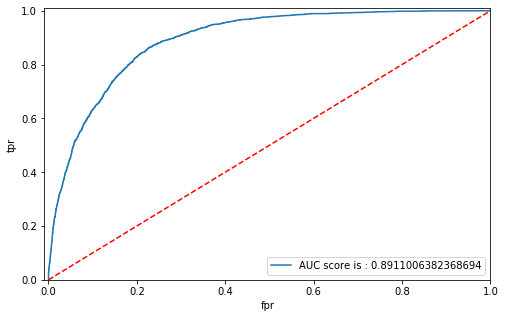

AUC Score for logistic regression is 0.8911006382368694


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test_logr[:,1])
auc_logr = auc(fpr_logr, tpr_logr)

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()

print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

Polynomial 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

logr_poly = LogisticRegression(random_state=0)

logr_poly.fit(X_train_poly,y_train)
ypred_train_logr_poly = logr_poly.predict(X_train_poly)
ypred_test_logr_poly = logr_poly.predict(X_test_poly)
yprob_test_logr_poly = logr_poly.predict_proba(X_test_poly)

MemoryError: Unable to allocate 110. TiB for an array with shape (36586, 414619206) and data type float64

In [ ]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr_poly), '\n', '\n')
print ('confusion_matrix for test data is with threshold of 0.5 is : \n', confusion_matrix(y_test,ypred_test_logr_poly), '\n')
print ('confusion_matrix for test data with threshold od 0.2 is : \n', confusion_matrix(y_test,yprob_test_logr_poly[:,1] > 0.2), '\n')

NameError: name 'ypred_train_logr_poly' is not defined

In [ ]:
print ('AUC Score for logistic regression w/o poly is', roc_auc_score(y_test,yprob_test_logr[:,1]))

In [ ]:
print ('AUC Score for logistic regression with polynomial features is', roc_auc_score(y_test,yprob_test_logr_poly[:,1]))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=15)
dt.fit(X_train,y_train)

ypred_train_dt = dt.predict(X_train) # Predictions on training data for DecisionTreeClassifer()
ypred_test_dt = dt.predict(X_test) # Predictions on testing data for DecisionTreeClassifer()

print ('confusion matrix for training data for default threshold of 0.5  is : \n', confusion_matrix(y_train,ypred_train_dt), '\n', '\n')
print ('confusion_matrix for test data for default threshol of 0.5 is : \n', confusion_matrix(y_test,ypred_test_dt), '\n')

confusion matrix for training data for default threshold of 0.5  is : 
 [[27832     0]
 [    3  8751]] 
 

confusion_matrix for test data for default threshol of 0.5 is : 
 [[8286  985]
 [1249 1676]] 



In [ ]:
yprob_test_dt = dt.predict_proba(X_test) # probability predictions based on DecisionTree Classifier

# print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_dt), '\n')
# print ('Recall for test data is : \n', recall_score(y_test,ypred_test_dt), '\n')
# print ('Precision for test data is : \n', precision_score(y_test,ypred_test_dt), '\n')
print ('AUC score for test data with DT is : \n', roc_auc_score(y_test,yprob_test_dt[:,1]))

AUC score for test data with DT is : 
 0.7333730860038702


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

ypred_train_rf = rf.predict(X_train) # Predictions on training data for RandomForest
ypred_test_rf = rf.predict(X_test) # Predictions on training data for RandomForest

print ('confusion matrix for training data for default threshold is : \n', confusion_matrix(y_train,ypred_train_rf), '\n', '\n')
print ('confusion_matrix for test data for default threshold is : \n', confusion_matrix(y_test,ypred_test_rf), '\n')

confusion matrix for training data for default threshold is : 
 [[27831     1]
 [    3  8751]] 
 

confusion_matrix for test data for default threshold is : 
 [[8671  600]
 [1408 1517]] 



In [ ]:
yprob_test_rf = rf.predict_proba(X_test) # probability predictions based on RandomForest

# print ('Scores for default threshold value of: ', 0.5, '\n')
# print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_rf), '\n')
# print ('Recall for test data is : \n', recall_score(y_test,ypred_test_rf), '\n')
# print ('Precision for test data is : \n', precision_score(y_test,ypred_test_rf), '\n')
print ('AUC score for test data with RF is : \n', roc_auc_score(y_test,yprob_test_rf[:,1]))

AUC score for test data with RF is : 
 0.8805865915864839


Compare Results

In [ ]:
auc_score = []
auc_score.append(roc_auc_score(y_test,yprob_test_logr[:,1]))
#auc_score.append(roc_auc_score(y_test,yprob_test_logr_poly[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_dt[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_rf[:,1]))
auc_scores1 = pd.Series(auc_score, index = ['Logistic', 'DT', 'RF'])
auc_scores1

Logistic    0.891101
DT          0.733373
RF          0.880587
dtype: float64

# Additional narrowing of features 

# Recursive feature Elimination and removing variables with high p-values

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(over_SX, over_Sy.values.ravel())
rank = rfe.ranking_
print(rfe.support_)
print(rfe.ranking_)

C:\Users\rebec\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


NameError: name 'over_SX' is not defined

In [ ]:
data_final_vars = df_final.columns.values.tolist()
d_rank = dict(zip(data_final_vars, rank ))
print(d_rank)

In [ ]:
for e in  ['relationship_Wife','relationship_Husband','hours_per_week_50','hours_per_week_60','race_White','hours_per_week_55','hours_per_week_45','age_50','age_26','education_Some-college','native_country_Mexico','hours_per_week_25','age_25','occupation_Machine-op-inspct','education_10th','marital_Separated','workclass_Private','age_24' ,'hours_per_week_30','age_19','age_22','age_21','occupation_Unknown','workclass_Unknown','hours_per_week_20', 'occupation_Handlers-cleaners','relationship_Other-relative','occupation_Adm-clerical','education_11th','race_Black', 'education_HS-grad' ,'occupation_Other-service','relationship_Own-child' ,'marital_Never-married']:
    d_rank.pop(e)
print(d_rank)

In [ ]:
cols = list(d_rank.keys())
print(cols)

In [ ]:
X = over_SX[cols]
y = over_Sy['incomegt50k_>50K']

In [ ]:
corm = X.corr()
masko = np.zeros_like(corm, dtype = np.bool)
masko[np.triu_indices_from(masko)] = True
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=False)
plt.show()

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

In [ ]:
cols

In [ ]:
cols=['sex_Female',
 'relationship_Unmarried',
 'marital_Divorced',
 'age_23',
 'marital_Widowed',
 'workclass_Federal-gov',
 'education_Doctorate',
 'workclass_Self-emp-inc',
 'education_Prof-school',
 'education_Masters',
 'education_Bachelors',
 'occupation_Prof-specialty',
 'occupation_Exec-managerial',
 'sex_Male',
 'marital_Married-civ-spouse']
X = over_SX[cols]
y = over_Sy['incomegt50k_>50K']

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

# logistic regression, confusion matrix, predict proba, polynomial, decision tree using variables cleaned via RFE by removing values with p-values higher than .05

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

# 

### Prediction and probability

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

ypred_train_logr = logr.predict(X_train)
ypred_test_logr = logr.predict(X_test)



print ('First 8 Predictions for training data are: ', ypred_train_logr[:30])
print ('First 8 Predictions for test data are: ', ypred_test_logr[:30])
print ('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logr.score(X_test,y_test)))

In [ ]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr), '\n')

In [ ]:
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train_logr), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train_logr), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train_logr), '\n')
print ('f1-score for train data is : \n', f1_score(y_train,ypred_train_logr), '\n')

In [ ]:
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1-score for test data is : \n', f1_score(y_test,ypred_test_logr), '\n')

In [ ]:
yprob_test_logr = logr.predict_proba(X_test)
yprob_test_logr[0:9,:].round(3) # Probabilities that the target variable is 0, 1

In [ ]:
yprob_test_logr[0:20,1].round(decimals=3)

In [ ]:
ypred_test_logr[0:9]

In [ ]:
confusion_matrix(y_test,ypred_test_logr) # Confusion matrix when threshold was default value of 0.5

In [ ]:
yprob_test_logr[:,1] >0.7

In [ ]:
confusion_matrix(y_test,yprob_test_logr[:,1] > 0.1) 

In [ ]:
print ('Scores for default threshold value of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,ypred_test_logr))

In [ ]:
x= 0.49
print ('Scores for threshold value of: ', x, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,yprob_test_logr[:,1] >x), '\n')
print ('Recall for test data is : \n', recall_score(y_test,yprob_test_logr[:,1] >x), '\n')
print ('Precision for test data is : \n', precision_score(y_test,yprob_test_logr[:,1] >x), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,yprob_test_logr[:,1] >x), '\n')

classification report on pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test_logr))


AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test_logr[:,1])
auc_logr = auc(fpr_logr, tpr_logr)

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()

print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

logr_poly = LogisticRegression(random_state=0)

logr_poly.fit(X_train_poly,y_train)
ypred_train_logr_poly = logr_poly.predict(X_train_poly)
ypred_test_logr_poly = logr_poly.predict(X_test_poly)
yprob_test_logr_poly = logr_poly.predict_proba(X_test_poly)

In [ ]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr_poly), '\n', '\n')
print ('confusion_matrix for test data is with threshold of 0.5 is : \n', confusion_matrix(y_test,ypred_test_logr_poly), '\n')
print ('confusion_matrix for test data with threshold od 0.2 is : \n', confusion_matrix(y_test,yprob_test_logr_poly[:,1] > 0.2), '\n')

In [ ]:
print ('AUC Score for logistic regression w/o poly is', roc_auc_score(y_test,yprob_test_logr[:,1]))

In [ ]:
print ('AUC Score for logistic regression with polynomial features is', roc_auc_score(y_test,yprob_test_logr_poly[:,1]))

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=15)
dt.fit(X_train,y_train)

ypred_train_dt = dt.predict(X_train) # Predictions on training data for DecisionTreeClassifer()
ypred_test_dt = dt.predict(X_test) # Predictions on testing data for DecisionTreeClassifer()

print ('confusion matrix for training data for default threshold of 0.5  is : \n', confusion_matrix(y_train,ypred_train_dt), '\n', '\n')
print ('confusion_matrix for test data for default threshol of 0.5 is : \n', confusion_matrix(y_test,ypred_test_dt), '\n')

In [ ]:
yprob_test_dt = dt.predict_proba(X_test) # probability predictions based on DecisionTree Classifier

# print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_dt), '\n')
# print ('Recall for test data is : \n', recall_score(y_test,ypred_test_dt), '\n')
# print ('Precision for test data is : \n', precision_score(y_test,ypred_test_dt), '\n')
print ('AUC score for test data with DT is : \n', roc_auc_score(y_test,yprob_test_dt[:,1]))

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

ypred_train_rf = rf.predict(X_train) # Predictions on training data for RandomForest
ypred_test_rf = rf.predict(X_test) # Predictions on training data for RandomForest

print ('confusion matrix for training data for default threshold is : \n', confusion_matrix(y_train,ypred_train_rf), '\n', '\n')
print ('confusion_matrix for test data for default threshold is : \n', confusion_matrix(y_test,ypred_test_rf), '\n')

In [ ]:
yprob_test_rf = rf.predict_proba(X_test) # probability predictions based on RandomForest

# print ('Scores for default threshold value of: ', 0.5, '\n')
# print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_rf), '\n')
# print ('Recall for test data is : \n', recall_score(y_test,ypred_test_rf), '\n')
# print ('Precision for test data is : \n', precision_score(y_test,ypred_test_rf), '\n')
print ('AUC score for test data with RF is : \n', roc_auc_score(y_test,yprob_test_rf[:,1]))

Compare results

In [ ]:
auc_score = []
auc_score.append(roc_auc_score(y_test,yprob_test_logr[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_logr_poly[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_dt[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_rf[:,1]))
auc_scores2 = pd.Series(auc_score, index = ['Logistic', 'Logistic with Poly', 'DT', 'RF'])
auc_scores2

Compare results before and after additional cleansing

In [ ]:
print(auc_scores1)
print(auc_scores2)

# Conclusion: Logistic with Polynomial features has highest before additional feature selection at 91.9%